<a href="https://colab.research.google.com/github/sujitpal/keras-tutorial-osdc2020/blob/master/01_04_exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this exercise, we will construct a CNN model to classify images using the CIFAR-10 dataset.

We will try to improve the quality of the classification using some strategies we listed in the previous notebook.

* Increase number of layers.
* Try regularization
  * L1, L2, L1+L2
  * Dropout.
  * BatchNorm.
* Adjust optimizer learning rate.
* Try out other optimizers.
* Adjust batch size.

We will also look at a data oriented approach which can also often help with performance.

* Data augmentation

__NOTE__: if you haven't already done so, set your runtime to use GPU (Runtime :: Change Runtime Type :: GPU). You will need it for this exercise.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras

%matplotlib inline

## Common Utilities

In [2]:
def plot_training_curves(history):
  epochs = np.arange(len(history.history["loss"]))
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, history.history["loss"], label="training")
  plt.plot(epochs, history.history["val_loss"], label="validation")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend(loc="best")

  plt.subplot(1, 2, 2)
  plt.plot(epochs, history.history["accuracy"], label="training")
  plt.plot(epochs, history.history["val_accuracy"], label="validation")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend(loc="best")

  plt.tight_layout()
  _ = plt.show()


## Dataset

Dataset is available through `keras.datasets`. Each image is of size (32, 32, 3). Labels are 0-9 indicating one of 10 classes.

* Normalize the image pixel values to the 0-1 range.
* Convert the image matrix to float32.
* One-hot encode the labels.

In [3]:
(Xtrain, ytrain), (Xtest, ytest) = keras.datasets.cifar10.load_data()

Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

170500096/170498071 [==============================] - 11s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

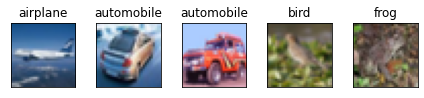

In [4]:
# from https://www.cs.toronto.edu/~kriz/cifar.html
id2label = {i:x for i, x in enumerate(
    ["airplane", "automobile", "bird", "cat", "deer",
     "dog", "frog", "horse", "ship", "truck"])}
image_ids = np.random.randint(0, high=Xtrain.shape[0], size=5)

for i, image_id in enumerate(image_ids):
  plt.subplot(1, 5, (i+1))
  plt.imshow(Xtrain[image_id])
  plt.title(id2label[ytrain[image_id][0]])
  plt.xticks([])
  plt.yticks([])

plt.tight_layout()
_ = plt.show()

In [5]:
# TODO: cast the input tensors to float32


In [6]:
# TODO: convert pixels from 0-255 range to 0-1 range


In [7]:
# TODO: one hot encode the labels


## Model 1 -- baseline

Build a CNN that will accept CIFAR-10 images and return a 10 way classification.

Your model should use a single convolution + pooling layer, and two Dense layers. The convolution layer should have 32 filters, each of size (3, 3). The pooling layer should be a max pooling layer with pool size (2, 2).

The number of hidden units in the first dense layer should be 512. The second dense layer is the output layer.

Since this is a n-way (n > 2) classification problem, use the categorical cross-entropy loss function. For this example, use the RMSProp optimizer, and accuracy as your metric.

Train your model for 5 epochs with a batch size of 128, using 20% of the training data for inline validation.

In [8]:
# TODO: define model as model_1


In [9]:
# TODO: compile model_1


In [10]:
# TODO: train model_1, save output of fit() into history_1


In [11]:
# TODO (optional): plot training plots for history_1 (or use Tensorboard)
# plot_training_curves(history_1)

## Model 2 -- increase number of conv/pool layers

Modify the model you just created and add in 2 additional convolution + pooling layers, with 64 and 128 filters respectively, all other parameters remaining the same.

Call this model 2.

In [12]:
# TODO: define model as model_2


In [13]:
# TODO: compile model_2


In [14]:
# TODO: train model_2, save output of fit() into history_2


In [15]:
# TODO (optional): plot training plots for history_2 (or use Tensorboard)
# plot_training_curves(history_2)

## Model 3: Dense layer regularization (L1, L2)

Modify the original model (`model_1`) to add weight regularization to the first Dense layer. Apply the following regularization:

* kerner_regularizer=`l1l2(l1=1e-5, l2=1e-4)`
* bias_regularizer=`l2(1e-4)`
* activity_regularizer=`l2(1e-5)`

In [16]:
# TODO: define model as model_3


In [17]:
# TODO: compile model_3


In [18]:
# TODO: train model_3, save output of fit() into history_3


In [19]:
# TODO (optional): plot training plots for history_3 (or use Tensorboard)
# plot_training_curves(history_3)

## Model 4: Add Dropout regularization

Modify `model_1` to add a `Dropout` layer between the two Dense layers in the network, such that during training, around 40% of the input neurons are dropped.

In [20]:
# TODO: define model as model_4


In [21]:
# TODO: compile model_4


In [22]:
# TODO: train model_4, save output of fit() into history_4


In [23]:
# TODO (optional): plot training plots for history_4 (or use Tensorboard)
# plot_training_curves(history_4)

## Model 5: Add BatchNorm

Modify `model_1` to add a `BatchNorm` layer after the `Conv2D` layer. This ensures that the input is centered around mean 0 and has standard deviation 1.

In [24]:
# TODO: define model as model_5


In [25]:
# TODO: compile model_5


In [26]:
# TODO: train model_5, save output of fit() into history_5


In [27]:
# TODO (optional): plot training plots for history_5 (or use Tensorboard)
# plot_training_curves(history_5)

## Model 6: Adjust Learning Rate

Train the baseline model `model_1` using the `RMSProp` optimizer with `learning_rate` set to `5e-3`.

In [28]:
# TODO: define model as model_6


In [29]:
# TODO: compile model_6


In [30]:
# TODO: train model_6, save output of fit() into history_6


In [31]:
# TODO (optional): plot training plots for history_6 (or use Tensorboard)
# plot_training_curves(history_6)

## Model 7: Choose a different optimizer

Switch out `RMSProp` with the `Adam` optimizer, with learning rate of `1e-3`.

In [32]:
# TODO: define model as model_7


In [33]:
# TODO: compile model_7


In [34]:
# TODO: train model_7, save output of fit() into history_7


In [35]:
# TODO (optional): plot training plots for history_5 (or use Tensorboard)
# plot_training_curves(history_7)

## Model 8: Change Batch Size

Retrain `model_1` using a smaller batch size of 64.

In [36]:
# TODO: define model as model_8


In [37]:
# TODO: compile model_8


In [38]:
# TODO: train model_8, save output of fit() into history_8


In [39]:
# TODO (optional): plot training plots for history_8 (or use Tensorboard)
# plot_training_curves(history_8)

## Model 9: Data Augmentation

The intuition here is that the mirror image of a truck or a horse is just as much a truck or horse as the original. Same goes for if the image was viewed from a different angle. The Keras `ImageDataGenerator` provides many ways to transform the input into an infinite stream of slightly different images. 

Note that the transformations you allow it to do will depend on the application. For example, for many applications it wouldn't make sense to do vertical mirror images, although for some it might.

Next we want to augment our data. See the Keras documentation for [an example of how to use ImageDataGenerator](https://keras.io/api/preprocessing/image/).

In [40]:
# TODO: declare the ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator


In [41]:
# TODO: define model as model_9


In [42]:
# TODO: compile model_9


In [43]:
# TODO: split the Xtrain and ytrain into 80/20 train and validation sets


In [44]:
# TODO: fit model_9 using data generator


In [45]:
# TODO (optional): plot training plots for history_9 (or use Tensorboard)
# plot_training_curves(history_9)

## Summary of Results

In [46]:
def plot_accuracies(methods, histories):
  train_accs, val_accs = [], []
  for method, history in zip(methods, histories):
    train_accs.append(history.history["accuracy"][-1])
    val_accs.append(history.history["val_accuracy"][-1])

  xs = np.arange(len(methods))
  width = 0.35
  plt.bar(xs, train_accs, width, color="b", label="train")
  plt.bar(xs+width, val_accs, width, color="orange", label="val")
  plt.axhline(y=train_accs[0], linestyle="--", color="b", xmin=0, xmax=1)
  plt.axhline(y=val_accs[0], linestyle="--", color="orange", xmin=0, xmax=1)
  plt.ylabel("accuracy")
  plt.xticks(xs, methods, rotation=90)
  plt.legend(loc="best")
  _ = plt.show()


# methods = [
#   "baseline",
#   "deeper network",
#   "L1/L2 regularization",
#   "dropout",
#   "batchnorm",
#   "learning rate",
#   "optimizer",
#   "batch size",
#   "data augmentation"
# ]
# histories = [history_1, history_2, history_3,
#              history_4, history_5, history_6,
#              history_7, history_8, history_9]

# plot_accuracies(methods, histories)

## Final Model: combine features

Now combine features that have shown good results, and train for 20 epochs.

Finally evaluate the trained model against the test set and report test set accuracy.

In [47]:
# TODO: define model as model_f

In [48]:
# TODO: compile model

In [49]:
# TODO: train model (20 epochs)

In [50]:
# TODO: evaluate against test set, report test accuracy